<a href="https://colab.research.google.com/github/pujaroy280/DATA608Story5/blob/main/PujaRoy_Story5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Story - 5 : What Is The Effect Of The Earth's Temperature on Cyclonic Storms?
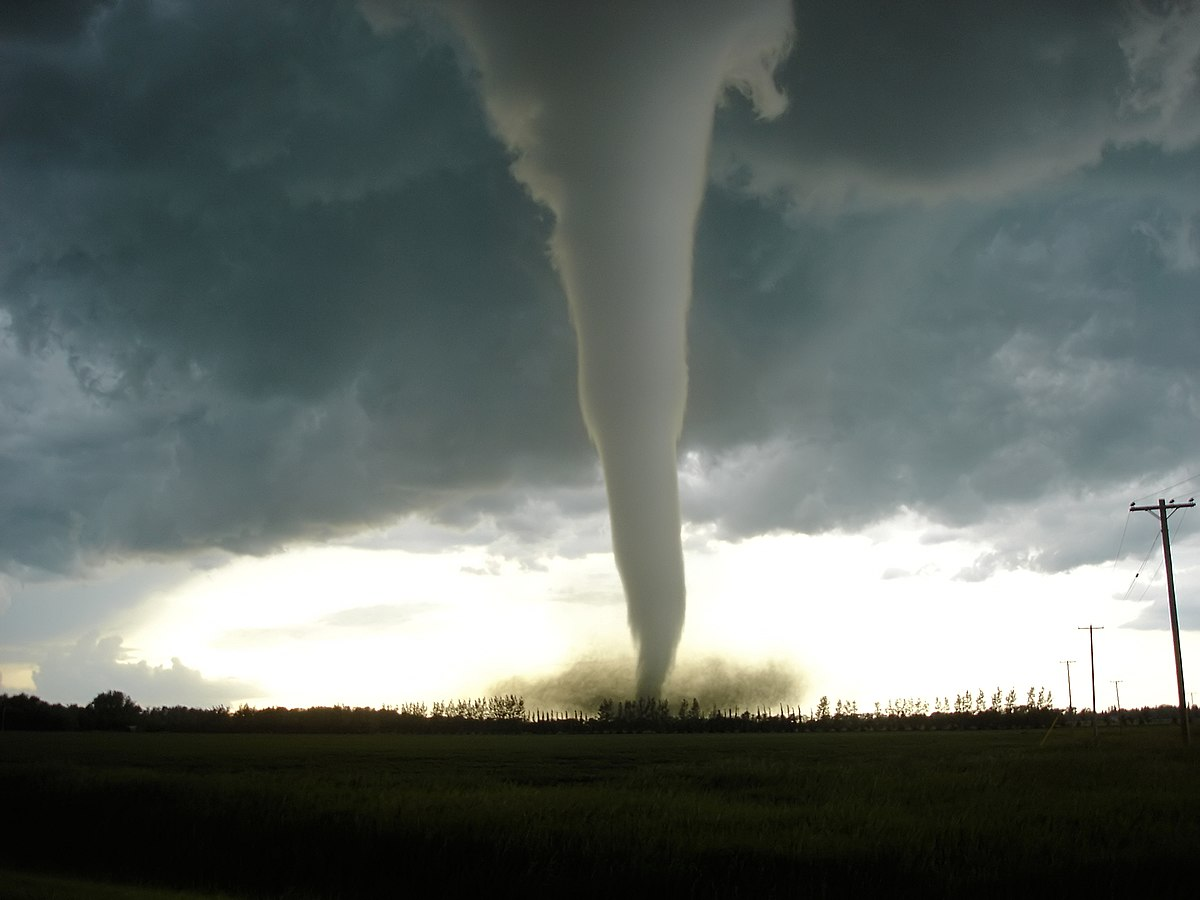
Historic data indicates that the occurrence and intensity of cyclonic storms (Hurricanes, Typhoons and Tornados) increases with the increased earth temperature. For this assignment you will need to tell this story to a non-technical audience (eg: a high-school earth science class).
Notes:
Source historic data for a period of at least 25 years on a measure of the earth's temperature.

Source data on the occurrence and intensity of hurricanes, typhoons and tornados for the same historic period.

Perform the data analysis to establish the correlations between earth temperature and storm occurrence and intensity.

Tell the story of this data and your analysis using data visualizations and other illustrations (eg: pictures of storm damage) in a presentation that will be accessible to a high-school earth science class.


### Load libraries

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

### Load the data

For this story, I used datasets from NOAA and Colarado State University:

**Climate at a Glance Global Time Series:**
https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/12/9/1998-2024?trend=true&trend_base=100&begtrendyear=1998&endtrendyear=2024

**U.S. Tornadoes:**

https://www.ncei.noaa.gov/access/monitoring/tornadoes/12/9?fatalities=false

**Global Historical Tropical Cyclone Statistics:**

https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=global


In [ ]:
# Load the data
df1 = pd.read_csv("https://raw.githubusercontent.com/pujaroy280/DATA608Story5/main/data.csv")
print(df1)
df2 = pd.read_csv("https://raw.githubusercontent.com/pujaroy280/DATA608Story5/main/data_two.csv")
print(df2)
df3 = pd.read_csv("https://raw.githubusercontent.com/pujaroy280/DATA608Story5/main/Global%20Historical%20Tropical%20Cyclone%20Statistics.csv")
print(df3)

   Global Land and Ocean October - September Average Temperature Anomalies  \
0                              Units: Degrees Celsius                        
1                              Base Period: 1901-2000                        
2                                       Missing: -999                        
3                                                Year                        
4                                                1998                        
5                                                1999                        
6                                                2000                        
7                                                2001                        
8                                                2002                        
9                                                2003                        
10                                               2004                        
11                                               2005           

In [ ]:
# Data Preparation
df_row = df1.iloc[4:].copy()
df_row.columns = ["YEAR", "ANOMALY TEMP"]
df_row["ANOMALY TEMP"] = pd.to_numeric(df_row["ANOMALY TEMP"])
df_f = df_row.copy()
df_f["ANOMALY TEMP"] = (df_f["ANOMALY TEMP"] * 9/5) + 32
df_index = df_f.copy()
df_index.index = range(1, len(df_index) + 1)
df_rank = df_index.copy()
df_rank["RANK"] = df_rank["ANOMALY TEMP"].rank(ascending=False)

    YEAR  ANOMALY TEMP
4   1998          0.66
5   1999          0.44
6   2000          0.43
7   2001          0.47
8   2002          0.63
9   2003          0.60
10  2004          0.58
11  2005          0.66
12  2006          0.66
13  2007          0.69
14  2008          0.52
15  2009          0.65
16  2010          0.75
17  2011          0.63
18  2012          0.63
19  2013          0.67
20  2014          0.75
21  2015          0.83
22  2016          1.08
23  2017          0.93
24  2018          0.86
25  2019          0.95
26  2020          1.04
27  2021          0.86
28  2022          0.92
29  2023          1.05


In [ ]:
# Calculate rank
df_rank["RANK"] = df_rank["ANOMALY TEMP"].rank(ascending=False)

# Plotting
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=df_rank["YEAR"], y=df_rank["ANOMALY TEMP"],
                      hovertext=["ANOMALY TEMP: {:.2f}°F<br>YEAR: {}<br>RANK: {}".format(temp, year, rank)
                                 for temp, year, rank in zip(df_rank["ANOMALY TEMP"], df_rank["YEAR"], df_rank["RANK"])],
                      marker=dict(color='rgb(192, 57, 79)')))
fig1.update_layout(title="<b>GLOBAL LAND AND OCEAN TEMPERATURE</b>",
                   xaxis_title="Year",
                   yaxis_title="Number of Temperature °F",
                   hoverlabel=dict(bgcolor="white"),
                   height=500, width=800)
fig1.show()

**In this plot below, the highest temperature anomaly was in 2016 with a 33.94 degrees Fahrenheit. The correlation between temperature anomalies and tornado activity highlights the intricate interconnections between climate dynamics and extreme weather events. While tornadoes are inherently complex phenomena influenced by a myriad of factors, including wind shear, atmospheric moisture, and atmospheric instability, the role of rising temperatures in shaping tornado activity cannot be overlooked.**

In [ ]:
# Reorder the DataFrame by rank in descending order
df_rank_sorted = df_rank.sort_values(by="RANK", ascending=False)

# Plotting
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=df_rank_sorted["YEAR"], y=df_rank_sorted["ANOMALY TEMP"],
                      hovertext=["ANOMALY TEMP: {:.2f}°F<br>YEAR: {}<br>RANK: {}".format(temp, year, rank)
                                 for temp, year, rank in zip(df_rank_sorted["ANOMALY TEMP"], df_rank_sorted["YEAR"], df_rank_sorted["RANK"])],
                      marker=dict(color='rgb(192, 57, 79)')))
fig1.update_layout(title="<b>GLOBAL LAND AND OCEAN TEMPERATURE</b>",
                   xaxis_title="Year",
                   yaxis_title="Number of Temperature °F",
                   hoverlabel=dict(bgcolor="white"),
                   height=500, width=800)
fig1.show()


In [ ]:
# Data Preparation
try:
    df2_row = df2.iloc[list(range(47)) + [73]].copy()
except IndexError:
    print("Index out of bounds. DataFrame may not have enough rows.")
    # Handle the index error here, such as adjusting the range or using different data

# Assuming the DataFrame was successfully created
df2_row.columns = ["DATE", "TORNADOES", "FATALITIES"]
df2_row["YEAR"] = df2_row["DATE"].str[:4]
df2_row = df2_row[["YEAR", "TORNADOES", "FATALITIES"]]
df2_row["TORNADOES"] = pd.to_numeric(df2_row["TORNADOES"], errors='coerce')
df2_row["FATALITIES"] = pd.to_numeric(df2_row["FATALITIES"], errors='coerce')
df2_row.dropna(inplace=True)

# Assuming further processing as per your requirement
df2_index = df2_row.copy()
df2_index.index = range(1, len(df2_index) + 1)
df2_col = df2_index[["YEAR", "TORNADOES", "FATALITIES"]].copy()
df2_rank = df2_col.copy()
df2_rank["TORNADOES RANK"] = df2_rank["TORNADOES"].rank(ascending=False)
df2_rank["FATALITIES RANK"] = df2_rank["FATALITIES"].rank(ascending=False)


In [ ]:
# Plotting
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=df2_rank["YEAR"], y=df2_rank["TORNADOES"],
                      hovertext=["TORNADOES: {}<br>YEAR: {}<br>TORNADOES RANK: {}".format(tornadoes, year, rank)
                                 for tornadoes, year, rank in zip(df2_rank["TORNADOES"], df2_rank["YEAR"], df2_rank["TORNADOES RANK"])],
                      marker=dict(color='GREEN')))
fig2.update_layout(title="<b>U.S. TORNADOES</b>",
                   xaxis_title="Year",
                   yaxis_title="Number of Tornadoes",
                   hoverlabel=dict(bgcolor="white"),
                   height=500, width=800)
fig2.show()

**The year 2023 had the highest count of tornadoes compared to 1951. People were dealing with a man vs. nature conflict.**

In [ ]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df2_rank["YEAR"], y=df2_rank["TORNADOES"], mode='lines',
                          text=["Year: {}<br>Tornadoes: {}<br>Tornadoes Rank: {}".format(year, tornadoes, rank)
                                for year, tornadoes, rank in zip(df2_rank["YEAR"], df2_rank["TORNADOES"], df2_rank["TORNADOES RANK"])],
                          hoverinfo='text',
                          line=dict(color='green')))
fig3.update_layout(title="<b>U.S. TORNADOES</b>",
                   xaxis_title="Year",
                   yaxis_title="Number of Tornadoes",
                   hoverlabel=dict(bgcolor="white"),
                   height=500, width=800)
fig3.show()

**The deadliest tornado outbreaks in US history occurred during 1953, 1965 and 1974 due to high number of fatalities. Factors Contributing to High Fatalities could be due to the intensity and duration of tornado outbreaks, the timing of the events, population density in affected areas, and the effectiveness of warning systems and emergency preparedness measures.**

**Reflecting on past tornado disasters reveals invaluable lessons that have shaped our understanding of these natural phenomena. Thanks to STEM, advancements in meteorological science and technology have significantly improved tornado forecasting capabilities, allowing forecasters to better anticipate and track these storms with greater precision.**

In [ ]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=df2_rank["YEAR"], y=df2_rank["FATALITIES"], mode='lines',
                          text=["Year: {}<br>Fatalities: {}<br>Fatalities Rank: {}".format(year, fatalities, rank)
                                for year, fatalities, rank in zip(df2_rank["YEAR"], df2_rank["FATALITIES"], df2_rank["FATALITIES RANK"])],
                          hoverinfo='text',
                          line=dict(color='blue')))
fig4.update_layout(title="<b>U.S. FATALITIES FROM TORNADOES</b>",
                   xaxis_title="Year",
                   yaxis_title="Number of Fatalities",
                   hoverlabel=dict(bgcolor="white"),
                   height=500, width=800)
fig4.show()

In [ ]:
# Data Preparation
df3_row = df3.iloc[16:].copy()
df3_row.columns = ["YEAR", "NAMED STORMS", "NAME STORM DAYS", "HURRICANES", "HURRICANES DAYS",
                   "CAT 3 AND ABOVE HURRICANES", "CAT 3 AND ABOVE HURRICANES DAYS", "ACCUMULATED CYCLONE ENERGY"]
df3_row = df3_row.apply(pd.to_numeric, errors='ignore')
df3_index = df3_row.copy()
df3_index.index = range(1, len(df3_index) + 1)
df3_rank = df3_index[["YEAR", "NAMED STORMS", "HURRICANES", "CAT 3 AND ABOVE HURRICANES"]].copy()
df3_rank = df3_rank.apply(pd.to_numeric, errors='ignore')
df3_rank["NAMED STORMS RANK"] = df3_rank["NAMED STORMS"].rank(ascending=False)
df3_rank["HURRICANES RANK"] = df3_rank["HURRICANES"].rank(ascending=False)
df3_rank["CAT 3 AND ABOVE HURRICANES RANK"] = df3_rank["CAT 3 AND ABOVE HURRICANES"].rank(ascending=False)


**In the data visualization titled "Meteorological Statistics Over the Years," it is evident that there were higher occurrences of named storms in 2020, hurricanes in 2018, and Category 3 and above hurricanes in 2015.**

In [ ]:
# Plotting
fig5 = make_subplots(rows=3, cols=1, subplot_titles=("NAMED STORMS", "HURRICANES", "CAT 3 AND ABOVE HURRICANES"))
for i, col in enumerate(["NAMED STORMS", "HURRICANES", "CAT 3 AND ABOVE HURRICANES"]):
    fig5.add_trace(go.Scatter(x=df3_rank["YEAR"], y=df3_rank[col],
                               mode='lines',
                               text=["Year: {}<br>{}: {}<br>{} Rank: {}".format(year, col, value, col, rank)
                                     for year, value, rank in
                                     zip(df3_rank["YEAR"], df3_rank[col], df3_rank[col + " RANK"])],
                               hoverinfo='text',
                               name=col), row=i + 1, col=1)
    fig5.update_xaxes(title_text="Year", row=i + 1, col=1)
    fig5.update_yaxes(title_text="Count", row=i + 1, col=1)
fig5.update_layout(title_text="Meteorological Statistics Over the Years",
                   title_x=0.5, showlegend=False,
                   height=1000)
fig5.show()

# Conclusion:
**In conclusion, my data analysis journey through meteorological statistics has provided valuable insights into the dynamic nature of weather patterns and their impact over the years. By examining trends in named storms, hurricanes, and Category 3 and above hurricanes, I have gained a deeper understanding of the forces at play in our atmosphere.**